In [1]:
!git clone https://github.com/omertafveez-2001/ThinkBeforeYouTest.git

Cloning into 'ThinkBeforeYouTest'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 39 (delta 14), reused 31 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (39/39), 277.38 KiB | 5.14 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [2]:
%%capture
!pip install "gluonts[torch]"
!pip install ujson evaluate accelerate
!pip install ruptures

In [3]:
%cd ThinkBeforeYouTest/

/kaggle/working/ThinkBeforeYouTest


In [4]:
import eval_pipeline
import visualisations
import stats
import warnings

warnings.filterwarnings("ignore")

2025-06-15 16:56:37.303672: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750006597.499942      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750006597.555827      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
# running eval from eval_pipeline
forecast, prediction_length, test_dataset = eval_pipeline.eval_(dataset_name = "traffic")

Getting traffic Dataset...
Dataset retrived...
Dataset split into train and test...
Load the model and config from Autoformer Transformers Implementation...


config.json:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/116k [00:00<?, ?B/s]

Computing predictions for the dataset...


model.safetensors:   0%|          | 0.00/92.7k [00:00<?, ?B/s]

Shape of the forecasts: (64, 100, 24)
Stacked Forecast for all the batches in the dataloader: (6034, 100, 24)
Evaluaing on MASE metric...


  0%|          | 0/6034 [00:00<?, ?it/s]

Autoformer univariate MASE: 0.849


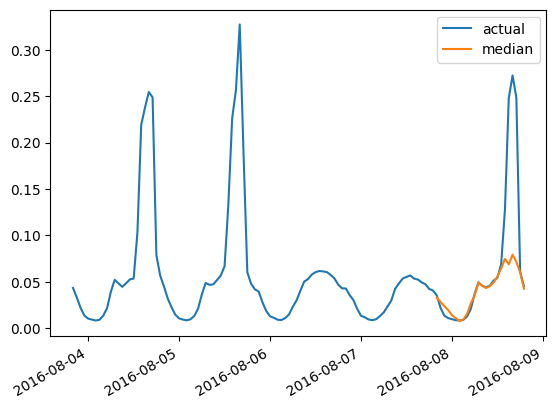

In [6]:
eval_pipeline.plot(5, test_dataset, prediction_length, forecast)

## **Structural Breaks**

In [7]:
break_pred, break_true, mean_forecast_ds, ground_truth_ds, breaks_per_hour, gt_breaks_per_hour = stats.structural_breaks(forecast, test_dataset, prediction_length)

100%|██████████| 6034/6034 [00:10<00:00, 599.52it/s]


Ground Truth Shape: (6034, 24)
Running BIC computation with primary method...
Test successful. First breakpoints: [445, 604]


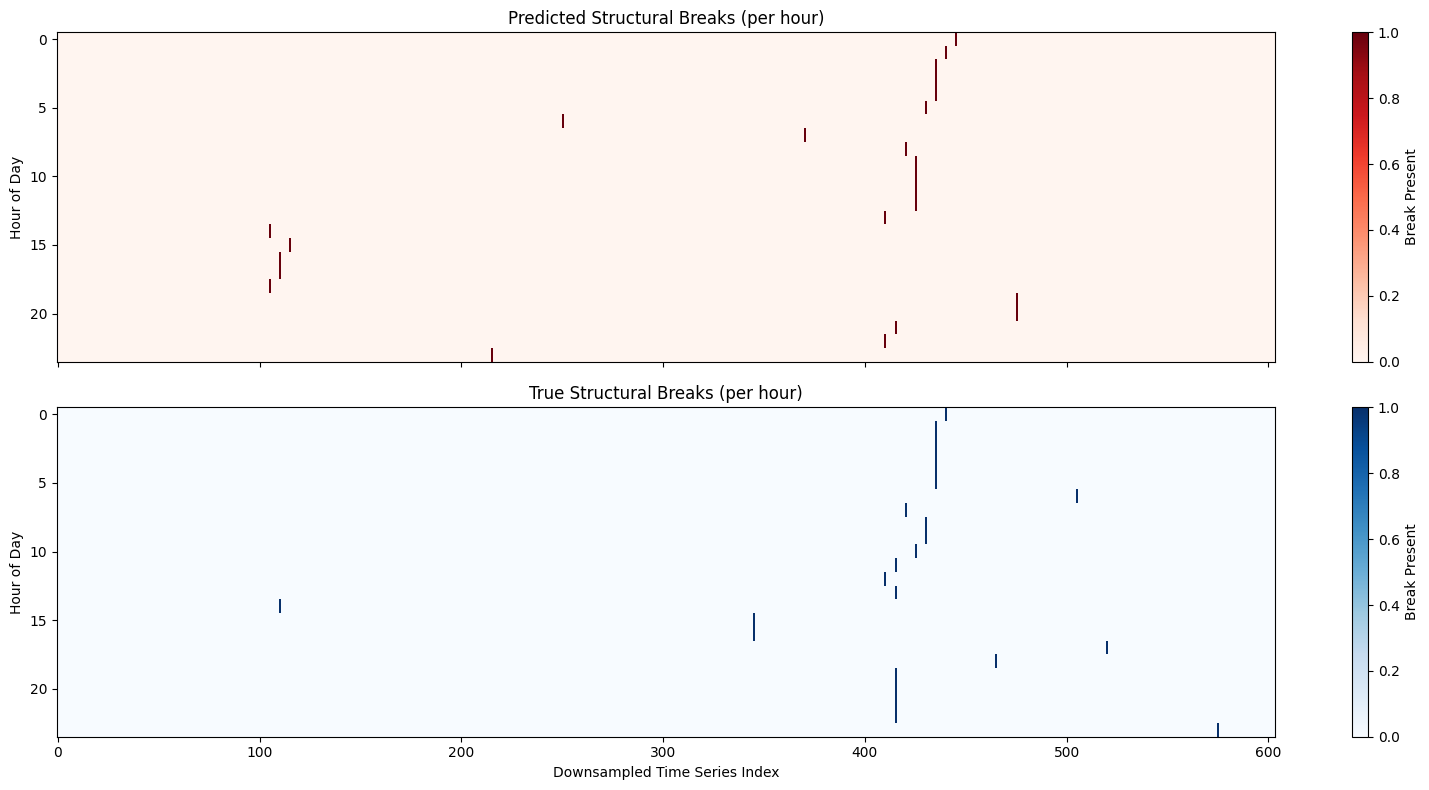

Total predicted breaks: 24.0
Total true breaks: 24.0
Breaks per hour (predicted): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Breaks per hour (true): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [8]:
visualisations.visualise_structuralbreaks(break_pred, break_true)

## **Analysis of Structural Breaks**

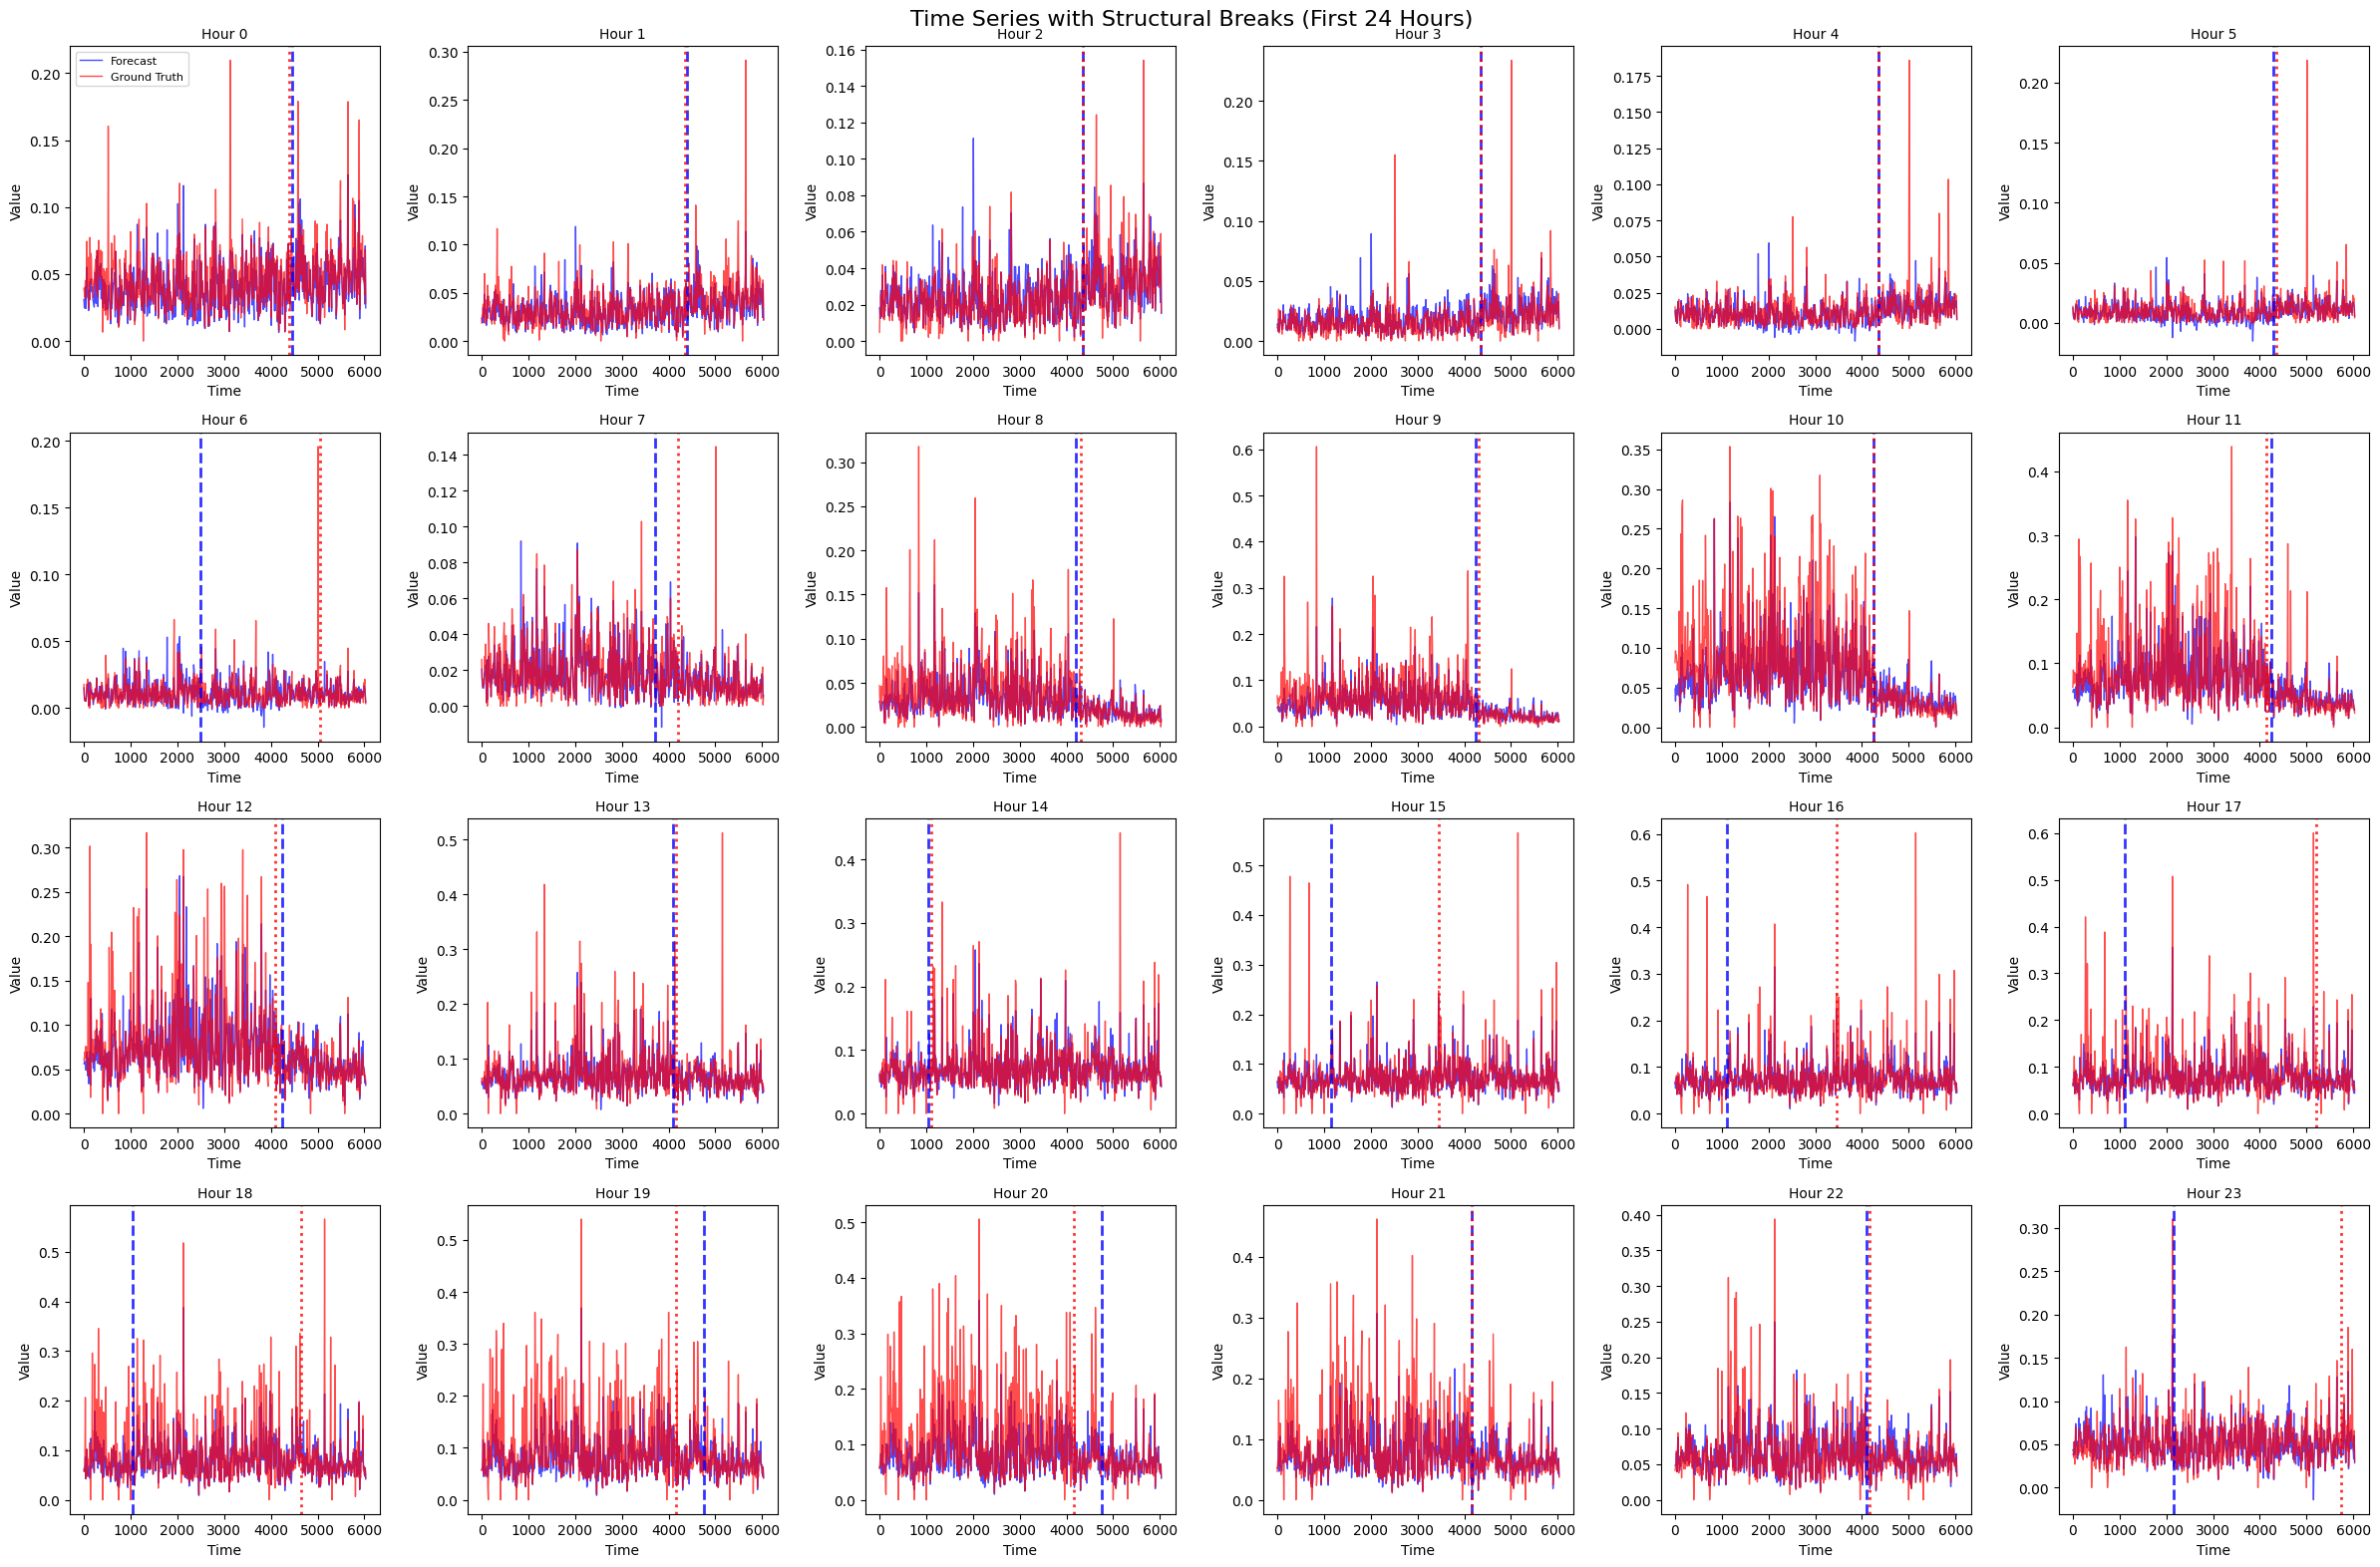

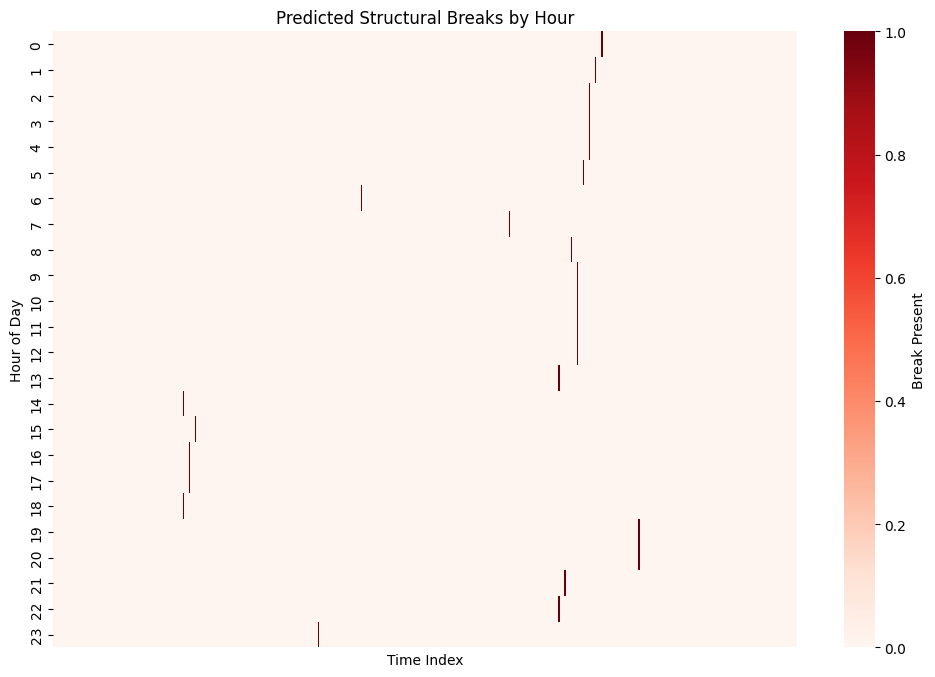

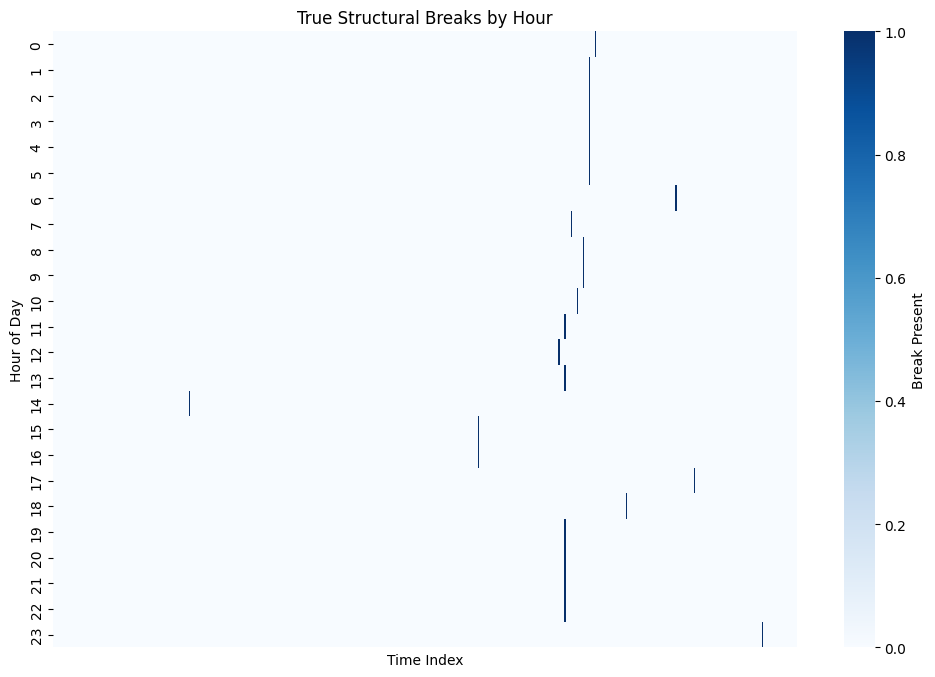

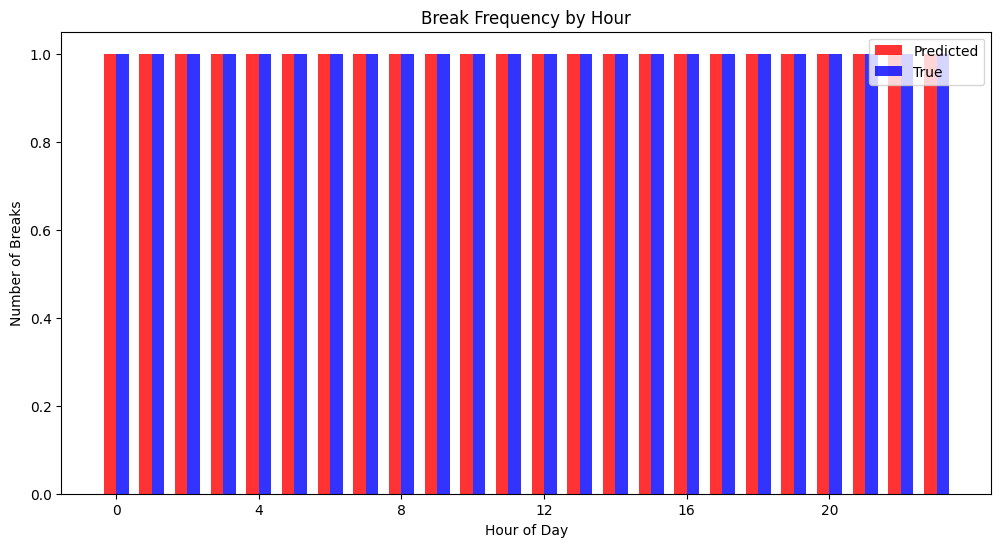

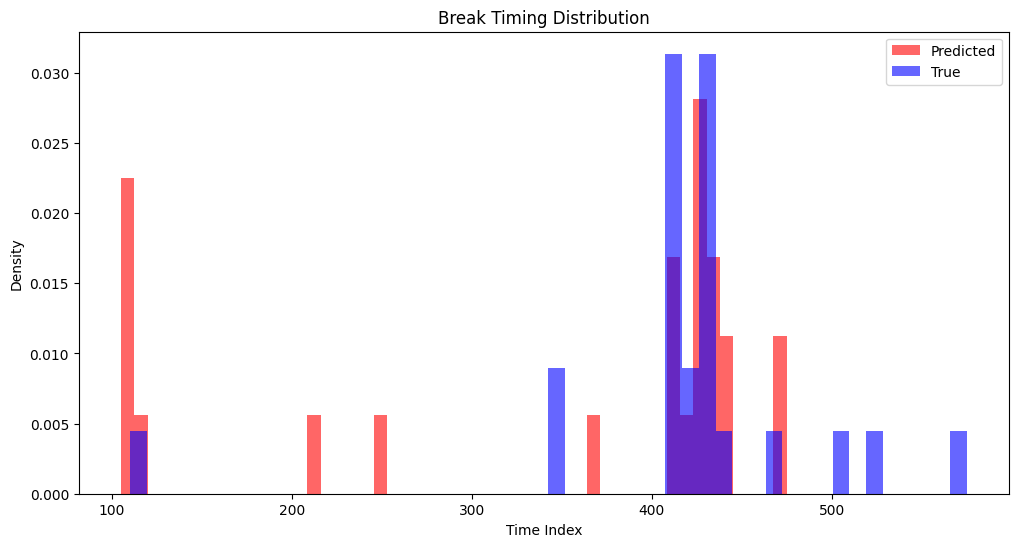

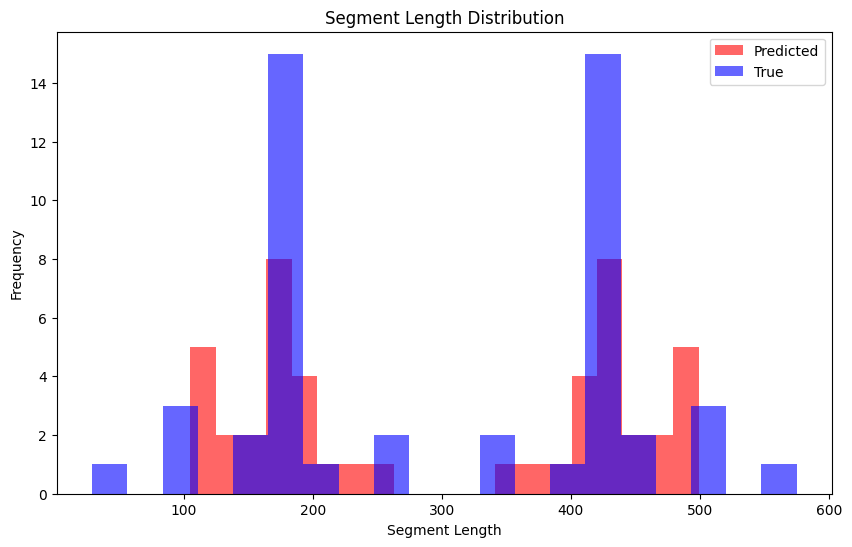

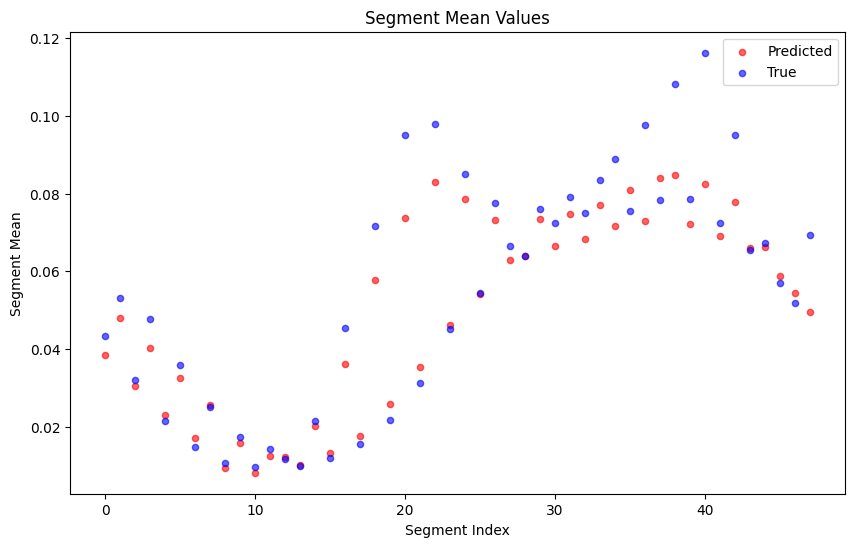

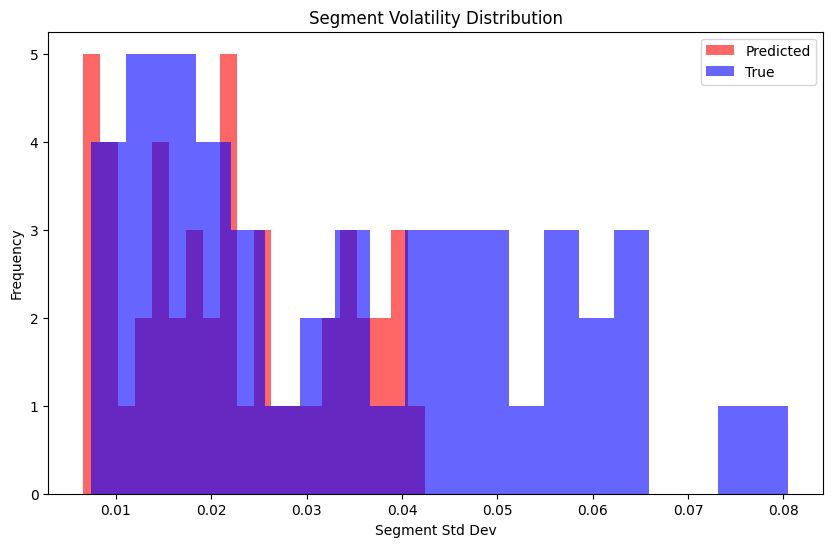

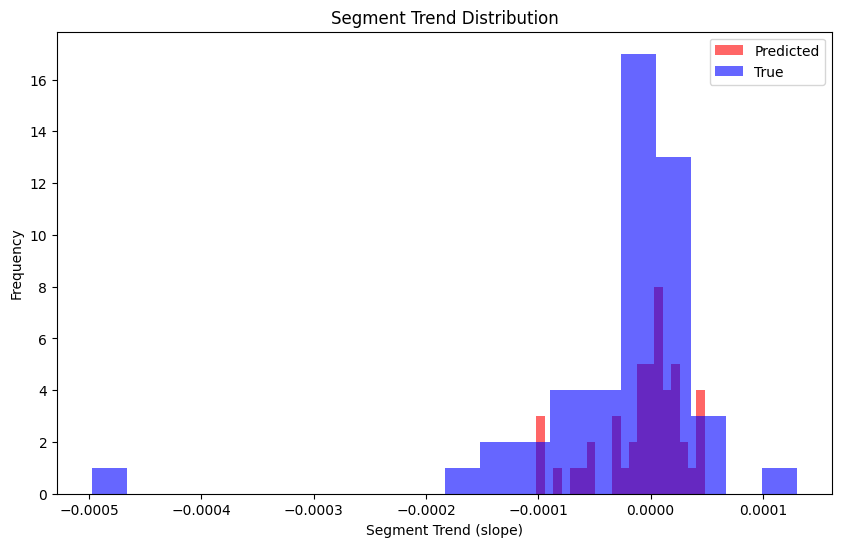

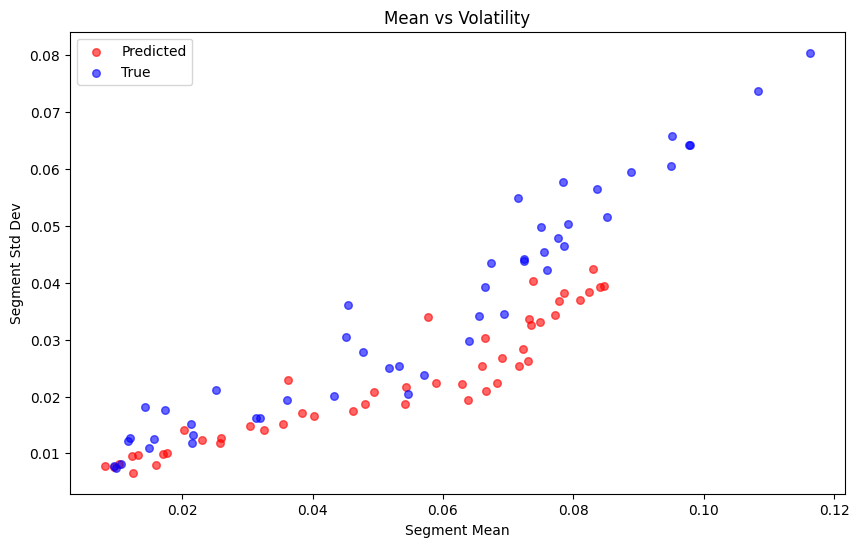

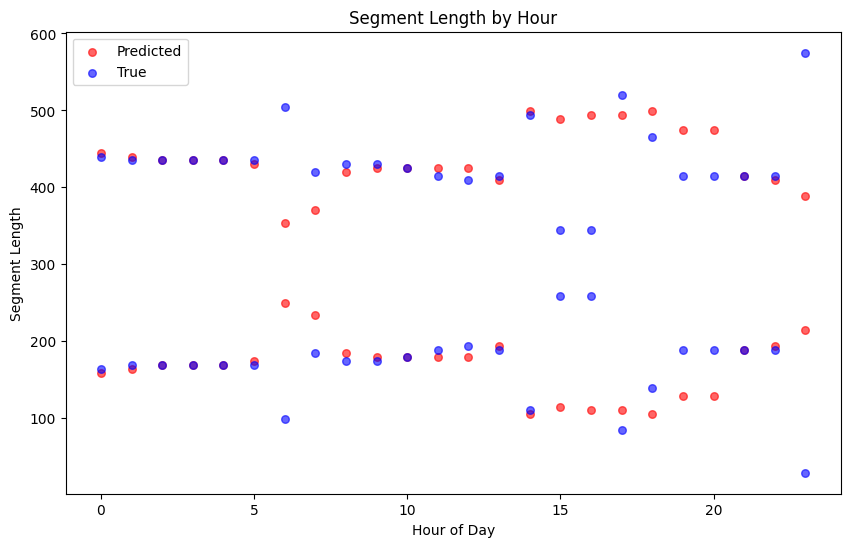

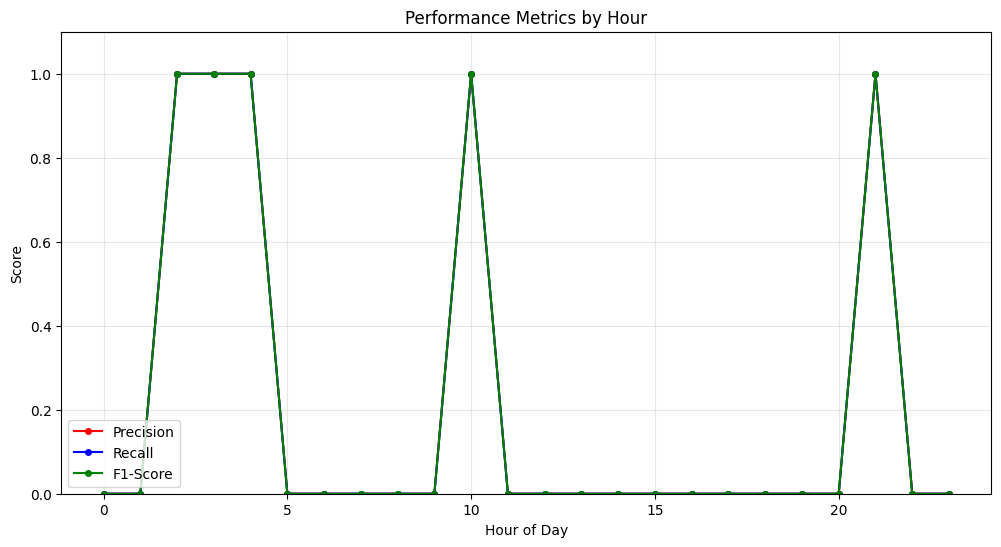

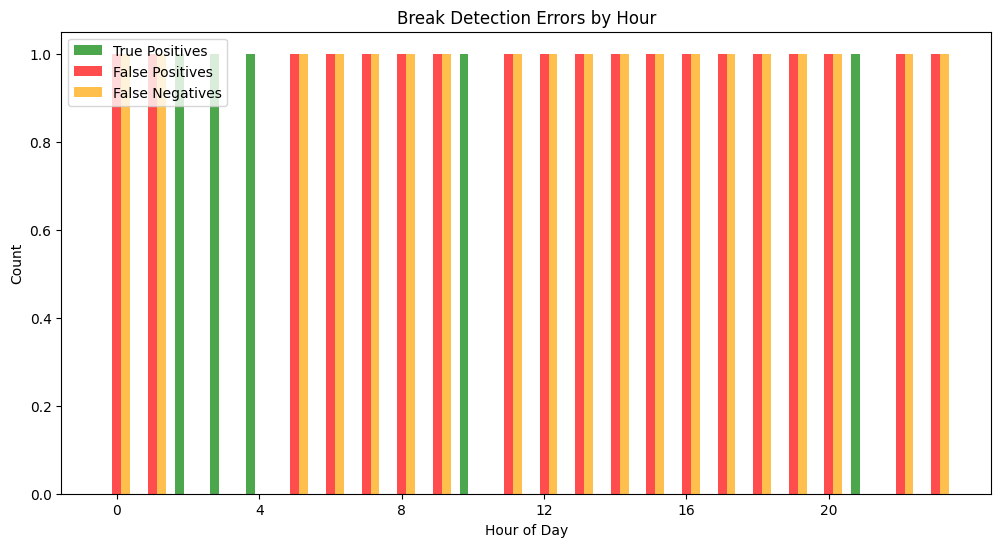

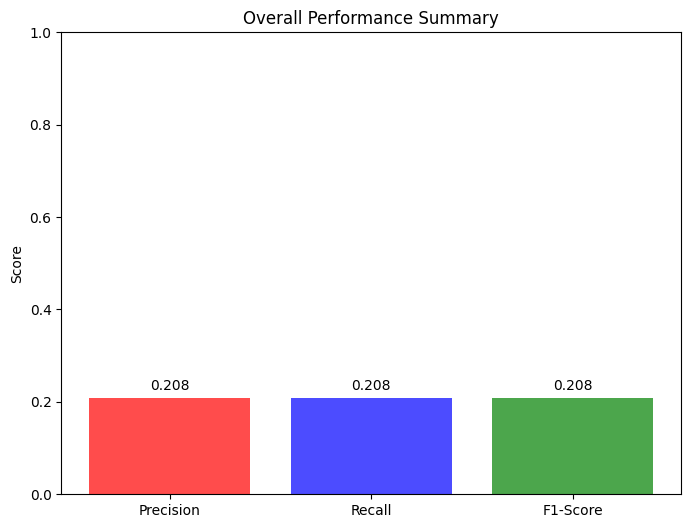

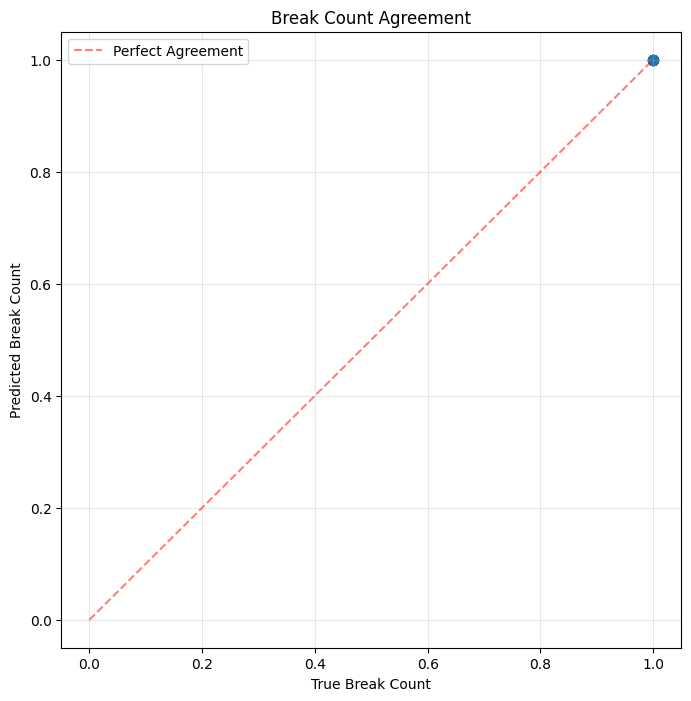

In [9]:
metrics, pred_segments, true_segments = visualisations.create_comprehensive_break_analysis(
    mean_forecast_ds, ground_truth_ds, breaks_per_hour, gt_breaks_per_hour
)

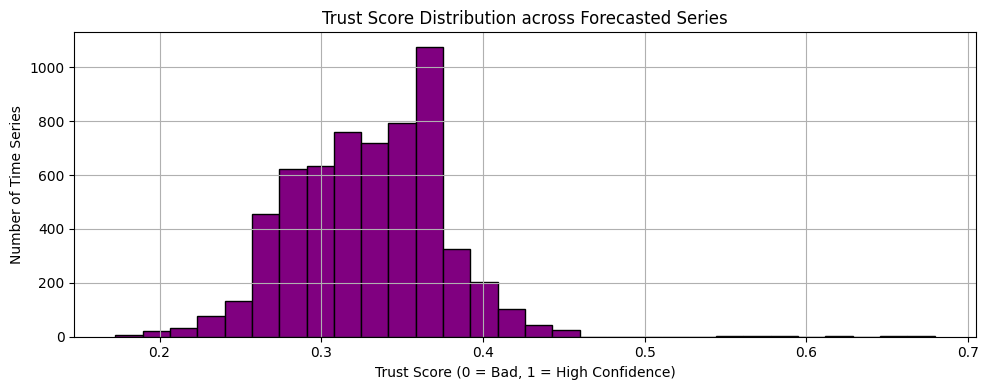

In [8]:
trust_score = stats.trust_score(forecast)
visualisations.visualise_trustscore(trust_score)